In [1]:
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt
import os
import pickle
from sklearn import preprocessing
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam


C:\Users\shrut\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
cifar10_dir = 'datasets/cifar-10-batches-py'
train_features, train_labels, test_features, test_labels = load_CIFAR10(cifar10_dir)
len_x_train = len(train_features)
len_x_test = len(test_features)
num_classes = len(train_labels)
print('Number of Training samples:', len_x_train)
print('Number of Testing samples:', len_x_test)

Number of Training samples: 50000
Number of Testing samples: 10000


In [3]:
# Hight and width of the images
IMAGE_SIZE = 32
# 3 channels, Red, Green and Blue
CHANNELS = 3


In [4]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.rcParams['figure.figsize'] = (2.0, 1.0)


C:\Users\shrut\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


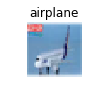

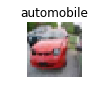

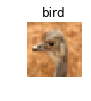

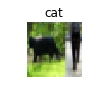

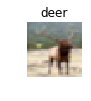

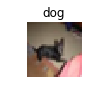

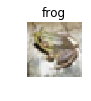

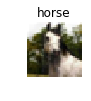

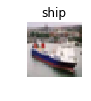

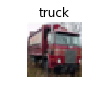

In [5]:
nclasses  = 10 # number of classes to visualize
nexamples = 1 # number of examples for each class
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
from scipy.misc import toimage
        
# # Creating plot with subplots
fig = plt.figure()
for i in range(nclasses):
        idx = train_labels
        idx, = np.where(train_labels==i)
        random_img = np.random.choice(idx,1)
        for j in range(nexamples):
            a = random_img[j]
            plt.imshow(toimage(train_features[a]))
            plt.axis('off')
            plt.title(class_names[i])
#             ax.set_title(class_names[j])
            plt.show()
            

In [6]:
num_training = 5000
mask = range(num_training)
X_train = train_features[mask]
y_train = train_labels[mask]

num_test = 500
mask = range(num_test)
X_test = test_features[mask]
y_test = test_labels[mask]

#num_test, _, _, _ =  X_test.shape
#num_classes = len(np.unique(y_train))


In [7]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(y_train, 10)
test_labels = np_utils.to_categorical(y_test, 10)
print((test_labels))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [8]:
def cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))    
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(nclasses, activation='softmax'))
    
    model.summary()
    
    return model

In [9]:
model = cnn_model()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [10]:

checkpoint = ModelCheckpoint('best_model_simple.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [11]:
model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(lr=1.0e-4), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

In [12]:
model_details = model.fit(X_train, train_labels,
                    batch_size = 128, # number of samples per gradient update
                    epochs = 100, # number of iterations
                    validation_data= (X_test, test_labels),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 5000 samples, validate on 500 samples
Epoch 1/100
5000/5000 [==============================] - 32s 6ms/step - loss: 2.2929 - acc: 0.1098 - val_loss: 2.2671 - val_acc: 0.1360
Epoch 2/100
5000/5000 [==============================] - 25s 5ms/step - loss: 2.2127 - acc: 0.1784 - val_loss: 2.0748 - val_acc: 0.2300
Epoch 3/100
5000/5000 [==============================] - 23s 5ms/step - loss: 2.0437 - acc: 0.2412 - val_loss: 1.9747 - val_acc: 0.3020
Epoch 4/100
5000/5000 [==============================] - 24s 5ms/step - loss: 1.9615 - acc: 0.2748 - val_loss: 1.8972 - val_acc: 0.3520
Epoch 5/100
5000/5000 [==============================] - 24s 5ms/step - loss: 1.8703 - acc: 0.3178 - val_loss: 1.8370 - val_acc: 0.3540
Epoch 6/100
5000/5000 [==============================] - 24s 5ms/step - loss: 1.8100 - acc: 0.3462 - val_loss: 1.7980 - val_acc: 0.3800
Epoch 7/100
5000/5000 [==============================] - 25s 5ms/step - loss: 1.7633 - acc: 0.3630 - val_loss: 1.7825 - val_acc: 0.3540
E

5000/5000 [==============================] - 30s 6ms/step - loss: 1.0279 - acc: 0.6322 - val_loss: 1.2664 - val_acc: 0.5600
Epoch 61/100
5000/5000 [==============================] - 29s 6ms/step - loss: 1.0228 - acc: 0.6378 - val_loss: 1.2706 - val_acc: 0.5560
Epoch 62/100
5000/5000 [==============================] - 34s 7ms/step - loss: 0.9976 - acc: 0.6492 - val_loss: 1.2616 - val_acc: 0.5720
Epoch 63/100
5000/5000 [==============================] - 31s 6ms/step - loss: 0.9972 - acc: 0.6522 - val_loss: 1.2616 - val_acc: 0.5680
Epoch 64/100
5000/5000 [==============================] - 34s 7ms/step - loss: 0.9817 - acc: 0.6500 - val_loss: 1.2686 - val_acc: 0.5780
Epoch 65/100
5000/5000 [==============================] - 33s 7ms/step - loss: 0.9744 - acc: 0.6538 - val_loss: 1.2702 - val_acc: 0.5740
Epoch 66/100
5000/5000 [==============================] - 35s 7ms/step - loss: 0.9651 - acc: 0.6598 - val_loss: 1.2829 - val_acc: 0.5600
Epoch 67/100
5000/5000 [==============================

In [13]:
scores = model.evaluate(X_test, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 58.20%


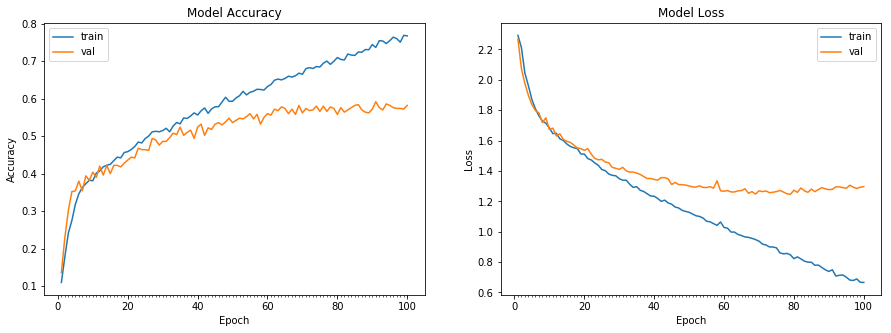

In [14]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
    
# Summarize history for accuracy
axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
axs[0].legend(['train', 'val'], loc='best')
    
# Summarize history for loss
axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
axs[1].legend(['train', 'val'], loc='best')
    
# Show the plot
plt.show()

In [15]:
class_pred = model.predict(X_test ,batch_size=32)
labels_pred = np.argmax(class_pred,axis=1)
correct = (labels_pred == (y_test))
num_image  = len(correct)
print("Accuracy: %.2f%%" % ((sum(correct)*100)/num_image))

Accuracy: 58.20%


In [16]:
incorrect, = np.where(correct == False)

# Images of the test-set that have been incorrectly classified.
images_error = X_train[incorrect]

# Get predicted classes for those images
labels_error = labels_pred[incorrect]

# Get true classes for those images
labels_true = y_test[incorrect]

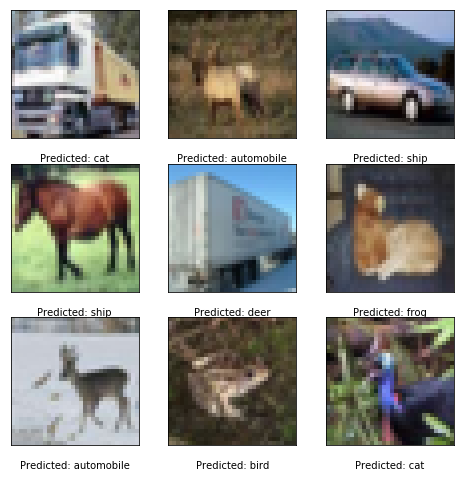

In [17]:
fig, axes = plt.subplots(3, 3, figsize = (8,8))

for i, ax in enumerate(axes.flat):

    # Plot the image
    ax.imshow(images_error[i])

    # Name of the true class
    labels_true_name = class_names[labels_true[i]]

    labels_pred_name = class_names[labels_pred[i]]

    xlabel = "\nPredicted: "+ labels_pred_name

    # Show the class on the x-axis
    ax.set_xlabel(xlabel)

    # Remove ticks from the plot
    ax.set_xticks([])
    ax.set_yticks([])
    
# Show the plot
plt.show()